In [1]:
%matplotlib notebook
import numpy as np

from astropy import units as u

from elisa import BinarySystem
from elisa import Star

# Demo No. 2 - Orbital motion

This demo will demonstrate capability of the package to produce orbital positions of a binary system in reference frame alligned with orbital plane and centered on the primary component.
Lets start by defining our binary system (see Demo No. 1): 

In [2]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K
)

secondary = Star(
    mass=0.45 * u.solMass,
    surface_potential=5.39,
    synchronicity=1.0,
    t_eff=8000 * u.K
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.00000 * u.d,
    phase_shift=0.0,
)

2021-09-07 09:27:30,586 - 7345 - binary_system.system - INFO: initialising object BinarySystem
2021-09-07 09:27:30,633 - 7345 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.


Lets now define phases at which we would like to obtain orbital positions:

In [3]:
phases = np.linspace(0, 1.0, num=5)

Finally, components distance, azimuth, mean anomaly and corresponding photometric phase of the binary can be calculated using following command: 

In [4]:
positions = bs.calculate_orbital_motion(phases)
positions

[Position(idx=0.0, distance=0.8207866831934495, azimuth=1.5707963267948966, true_anomaly=0.5585053606381853, phase=0.0),
 Position(idx=1.0, distance=1.1032508351682753, azimuth=3.289647763531197, true_anomaly=2.2773567973744857, phase=0.25),
 Position(idx=2.0, distance=1.1904578657982738, azimuth=4.407792555729993, true_anomaly=3.395501589573282, phase=0.5),
 Position(idx=3.0, distance=0.9653336479971236, azimuth=5.6970505011458785, true_anomaly=4.684759534989167, phase=0.75),
 Position(idx=4.0, distance=0.8207866831934495, azimuth=1.5707963267948961, true_anomaly=0.5585053606381848, phase=1.0)]

Each parameter of the given orbital Position can be accesed separatelly and it containes a named tuple. Each named tuple contains following items

 - `idx`: unique index characterizing the observation within the time-series
 - `distance`: distance between the components in SMA units. This identifier is not used in SingleSystem                      positions.
 - `azimuth` ($A$): angle between $x$-axis of co-rotating frame of reference and $y$-axis in the fixed frame  of reference relative to the observer. In case of binary systems, the azimuth $A$ can be expressed as: $A$ = $\nu$ + $\omega$, where $\omega$ is argument of periastron and $\nu$ is true anomaly in case of binary systems. In case of single star systems, the azimuth corresponds to the angle of rotation: $A = 2\pi\frac{t+T_0}{P}$
 - `true_anomaly` ($\nu$): true anomaly of the secondary component. This identifier is not used in `SingleSystem`.
 - `phase`: photometric phase of the system defined by the systems ephemeris.

An access to the element of the `Position` named tuple is follows:

In [5]:
positions[0].azimuth

1.5707963267948966

Orbital positions can be also returned in form of numpy array by using keyword argument `return_nparray`:

In [6]:
bs.calculate_orbital_motion(phases, return_nparray=True)

array([[0.        , 0.82078668, 1.57079633, 0.55850536, 0.        ],
       [1.        , 1.10325084, 3.28964776, 2.2773568 , 0.25      ],
       [2.        , 1.19045787, 4.40779256, 3.39550159, 0.5       ],
       [3.        , 0.96533365, 5.6970505 , 4.68475953, 0.75      ],
       [4.        , 0.82078668, 1.57079633, 0.55850536, 1.        ]])

## Visualizing orbit

2D plot of the orbit can be displayed using following command:

<IPython.core.display.Javascript object>


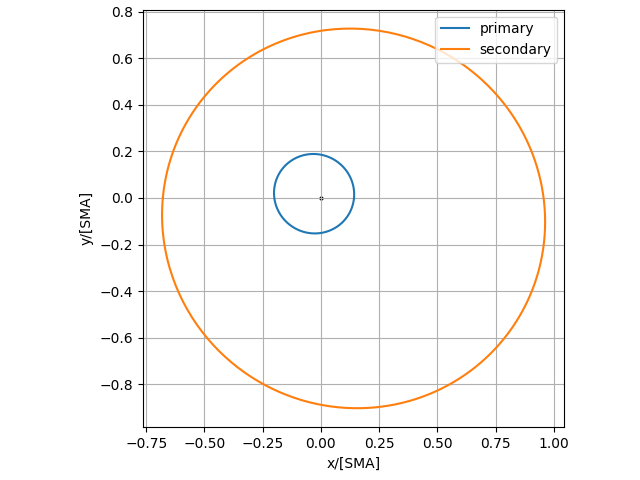

In [7]:
bs.plot.orbit(frame_of_reference='barycentric',
              axis_units ='SMA')